<a href="https://colab.research.google.com/github/prasadmlexpert/objectidentificationvideo/blob/main/FastAPIExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastapi nest-asyncio pyngrok uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 745 kB 10.0 MB/s 
     |████████████████████████████████| 57 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=7f5510f51e3e955ab551fafbc9b871a79ffbacd025a9e82a407a253e1068c657
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [13]:
from typing import Union

from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()


class Item(BaseModel):
    name: str
    price: float
    is_offer: Union[bool, None] = None


@app.get("/")
def read_root():
    return {"Hello": "World"}


@app.get("/items/{item_id}")
def read_item(item_id: int, q: Union[str, None] = None):
    return {"item_id": item_id, "q": q}


@app.put("/items/{item_id}")
def update_item(item_id: int, item: Item):
    return {"item_name": item.name, "item_id": item_id}


In [6]:
!pip install python-multipart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=2b1fe8919894aa2a39de9a6bf82f6c3b89960e25f80e06fedb7146d66c65d63f
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built python-multipart


In [20]:
# app.py
from fastapi import FastAPI, File, UploadFile, Form

app = FastAPI()

#def image_function(imagePointer):
@app.post('/file')
def _file_upload(my_file: UploadFile = File(...),first: str = Form(...)):
  return {
      "name": my_file.filename,
      "first": first
      }

In [11]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://4d6d-34-75-233-20.ngrok.io


INFO:     Started server process [60]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [60]


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
%cd "/content/drive/.shortcut-targets-by-id/16kphvlmJsL1izzffpLfadthz0YrraYkW/ImageIdetificationProject/Project_work/"

/content/drive/.shortcut-targets-by-id/16kphvlmJsL1izzffpLfadthz0YrraYkW/ImageIdetificationProject/Project_work


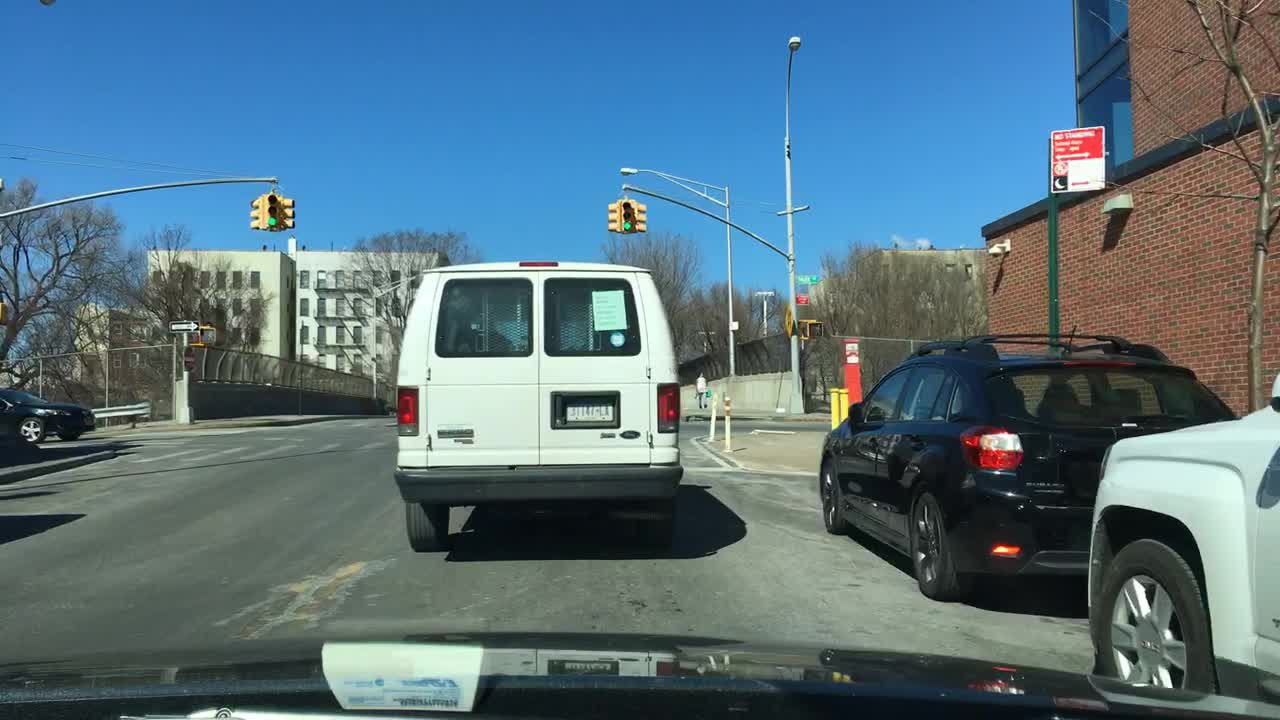

In [19]:
# client.py
import requests
import cv2
from google.colab.patches import cv2_imshow

#filename = "requirements.txt"
filename = cv2.imread('images/10k/train/004071a4-049be89b.jpg')
cv2_imshow(filename)


In [ ]:
files = {'my_file': (filename, open(filename, 'rb'))}

response = requests.post('http://3621-34-75-233-20.ngrok.io:8000/file', files=files)

#print(response.status_code)
#print(response.json())